# Big Data Management Assignment 6: Mastering Big Data Handling
### Group Name: Avengers
### Dataset: Amazon Book Reviews
### Date: 9th December, 2023
### Group Members

| Name                                     | Matrix Number |
| :---------------------------------------- | :-------------: |
| Ismail Maeen Fateh Allah Yaqot Alawami   |  MCS221028    |   
|LWANGA AKSAM              |  MCS231016    |
|BAKUNGA BRONSON             |   MCS232006   |  



In [1]:
# Setting up dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd


# Dataset Information
The dataset titled "Amazon Book Reviews" was obtained from Kaggle. You can find the dataset here: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv
We focus on the "Books_rating.csv" file which is 2.7GB, which fits our data size requirements.

## Initial dataset import

In [2]:
# Importing datasets
%time book_reviews_ratings_df = pd.read_csv("Books_rating.csv")


CPU times: user 25.9 s, sys: 1.36 s, total: 27.3 s
Wall time: 27.8 s


In [3]:
%time books_data_df=pd.read_csv("books_data.csv")

CPU times: user 1.96 s, sys: 245 ms, total: 2.2 s
Wall time: 2.33 s


In [4]:
#let's first see the first few rows to understand the datatset
book_reviews_ratings_df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [5]:
books_data_df.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [6]:
#let's see the number of rows  and columns
book_reviews_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [7]:
books_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [8]:
# Merging  both dataframes using 'Title' column
%time book_reviews = pd.merge(book_reviews_ratings_df, books_data_df, on='Title', how='inner')

# Display the first few rows of the merged dataframe
book_reviews.head()


CPU times: user 1.07 s, sys: 287 ms, total: 1.36 s
Wall time: 1.42 s


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [9]:
book_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
 10  description         object 
 11  authors             object 
 12  image               object 
 13  previewLink         object 
 14  publisher           object 
 15  publishedDate       object 
 16  infoLink            object 
 17  categories          object 
 18  ratingsCount        float64
dtypes: float64(3), int64(1), object(15)
memory usage: 434.9+ MB


# Strategies Breakdown

## Loading less data

In [10]:
# Measurements
## Memory usage
## Computation time
## File size
print("Memory Usage Per Column")
book_reviews.memory_usage(deep=True)

Memory Usage Per Column


Index                        128
Id                     201000000
Title                  283750173
Price                   24000000
User_id                190443659
profileName            194945088
review/helpfulness     180922789
review/score            24000000
review/time             24000000
review/summary         255280402
review/text           2638894911
description           2565140634
authors                219493680
image                  421321244
previewLink            496644711
publisher              186977554
publishedDate          182350049
infoLink               418779102
categories             196082615
ratingsCount            24000000
dtype: int64

In [11]:
total_memory_usage=book_reviews.memory_usage(deep=True).sum() / (1024 ** 3)
print(f"Total Memory Usage :{total_memory_usage:0.2f} GBs")

Total Memory Usage :8.13 GBs


# Project Scope

## Objective
To perform a temporal analysis of customer sentiment across the Fiction and Non-fiction genres using the dataset, with a specific focus on how sentiment trends evolve over a defined period.

## Genres
- Fiction
- Non-fiction (Identified using the 'categories' column)

## Time Frame
- **Analysis Period:** Reviews from the last five years (2008-2013).
- **Temporal Resolution:** Analysis could be broken down by year, quarter, or month, depending on the granularity of the 'review/time' information available.

## Memory Usage Considerations
- **Date Filtering:** We will filter reviews using the 'review/time' column to include only those within the specified time frame, reducing data volume.
- **Genre Filtering:** We will use the 'categories' column to include only reviews from the selected genres, further narrowing the data scope.
- **Column Selection:** We will load only the columns necessary for our analysis ('Title', 'review/text', 'review/time', 'review/score', and 'categories') to minimize memory footprint.

## Analysis Stages
1. **Data Preparation:** Load and preprocess the data to ensure it's in the correct format for temporal analysis.
2. **Sentiment Analysis:** Apply NLP techniques to assess the sentiment of each review.
3. **Temporal Aggregation:** Group sentiment data by time periods and categories (genres).
4. **Trend Identification:** Observe trends in sentiment over the analysis period.



# Data Preparation

During the Data Preparation stage, we will:

1. **Load the dataset** while selecting only the necessary columns for analysis ('Title', 'categories', 'review/text', 'review/time', and 'review/score') to minimize the memory usage.
2. **Parse the date column** ('review/time') to a `datetime` format to facilitate temporal analysis.
3. **Filter the dataset** based on the date range (last five years: 2008-2013) and genres specified in our project scope ('Fiction' and 'Non-fiction'), using the 'categories' column for genre identification.

By completing these steps, we ensure the dataset is in the correct format for temporal analysis and contains only the most relevant information for our analysis, which helps in managing memory usage effectively.


In [12]:
from datetime import datetime
def contains_genre(category_str):
    if pd.isna(category_str):
        return False
    # Evaluating the string to a list
    try:
        category_list = eval(category_str)
    except:
        return False
    # Check if 'Fiction' or 'Non-fiction' is in the list
    return any(genre in category_list for genre in ['Fiction', 'Non-fiction'])

book_reviews['review/time'] = pd.to_datetime(book_reviews['review/time'], unit='s')

start_date = datetime(2008, 1, 1)
end_date = datetime(2013, 3, 4)

# Filter the dataset based on the adjusted time frame

%time filtered_book_reviews = book_reviews[(book_reviews['review/time'] >= start_date) &(book_reviews['review/time'] < end_date) &(book_reviews['categories'].apply(contains_genre))]


CPU times: user 10 s, sys: 20.1 ms, total: 10 s
Wall time: 10.1 s


In [13]:
filtered_book_reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
306,B000PHTCGG,Seance,NaN,A1OD12WATUM1GL,S. Rubin,0/0,3.0,2012-12-23,Singer writes scary stories,&#34;The Seance&#34; is a collection of short ...,"Mysterieus, duister en passioneel Londen, 19de...",['Kevin Valgaeren'],http://books.google.com/books/content?id=BiOTC...,http://books.google.nl/books?id=BiOTCwAAQBAJ&p...,Lannoo Meulenhoff - Belgium,2016-02-13,https://play.google.com/store/books/details?id...,['Fiction'],NaN
307,B000PHTCGG,Seance,NaN,A1OB5L3WMHJAD9,Christopher Culver,0/0,4.0,2012-08-08,Short stories that use Jewish peasant life to ...,THE S&Eacute;ANCE AND OTHER STORIES is a colle...,"Mysterieus, duister en passioneel Londen, 19de...",['Kevin Valgaeren'],http://books.google.com/books/content?id=BiOTC...,http://books.google.nl/books?id=BiOTCwAAQBAJ&p...,Lannoo Meulenhoff - Belgium,2016-02-13,https://play.google.com/store/books/details?id...,['Fiction'],NaN
330,B000KBH818,Trouble on Titan,NaN,AKY819078CJN1,"comatus ""comatus""",3/3,5.0,2011-03-18,"On reflection, what do you think of it now?","Twelve years after the first review, and Cassi...",NaN,['Alan Nourse'],NaN,http://books.google.nl/books?id=dyUMOQAACAAJ&d...,Ace Books,1986,http://books.google.nl/books?id=dyUMOQAACAAJ&d...,['Fiction'],1.0
587,B000N7612G,The Food Of Love,NaN,A1FGFBC0DZ7G00,"A. Cooper ""Book Buying Grandmother""",0/0,5.0,2012-12-16,Fun Novel for Foodies,This novel is just fun...not super serious lit...,Een heerlijke roman over culinaire verleiding ...,['Anthony Capella'],http://books.google.com/books/content?id=pyFZA...,http://books.google.nl/books?id=pyFZAgAAQBAJ&p...,Boekerij,2013-12-17,http://books.google.nl/books?id=pyFZAgAAQBAJ&d...,['Fiction'],NaN
588,B000N7612G,The Food Of Love,NaN,A2V6FC7GVZ6T7M,P. Newhart,0/0,5.0,2010-09-26,The Food of Love,A tale of tangled relationships and excellent ...,Een heerlijke roman over culinaire verleiding ...,['Anthony Capella'],http://books.google.com/books/content?id=pyFZA...,http://books.google.nl/books?id=pyFZAgAAQBAJ&p...,Boekerij,2013-12-17,http://books.google.nl/books?id=pyFZAgAAQBAJ&d...,['Fiction'],NaN


In [14]:
# Measure memory usage after filtering
filtered_memory_usage = filtered_book_reviews.memory_usage(deep=True).sum() / (1024 ** 3)
print(f"Total Initial Memory Usage :{total_memory_usage:0.2f} GBs")
print(f"Total Filtered Memory Usage :{filtered_memory_usage:0.2f} GBs")

Total Initial Memory Usage :8.13 GBs
Total Filtered Memory Usage :0.84 GBs


#Inorder to further our understanding we tried to do some NLP

### **Sentiment Analysis**
Apply Natural Language Processing (NLP) techniques to assess the sentiment of each review.

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment from review text
def get_sentiment(review):
    if pd.isna(review):
        return None
    return sia.polarity_scores(review)["compound"]

# Apply sentiment analysis
%time filtered_book_reviews['sentiment'] = filtered_book_reviews['review/text'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bakunga/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


CPU times: user 3min 48s, sys: 5.13 s, total: 3min 53s
Wall time: 3min 55s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### **Temporal Aggregation**
Group sentiment data by time periods and categories (genres).

In [16]:
# Group by year and category for sentiment analysis
filtered_book_reviews['year'] = filtered_book_reviews['review/time'].dt.year
grouped_data = filtered_book_reviews.groupby(['year', 'categories'])['sentiment'].mean().reset_index()


/var/folders/s4/g54wg_l110g1__ts615yy6b40000gn/T/ipykernel_34532/612796918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_book_reviews['year'] = filtered_book_reviews['review/time'].dt.year


### **Trend Identification**
Observe trends in sentiment over the analysis period.

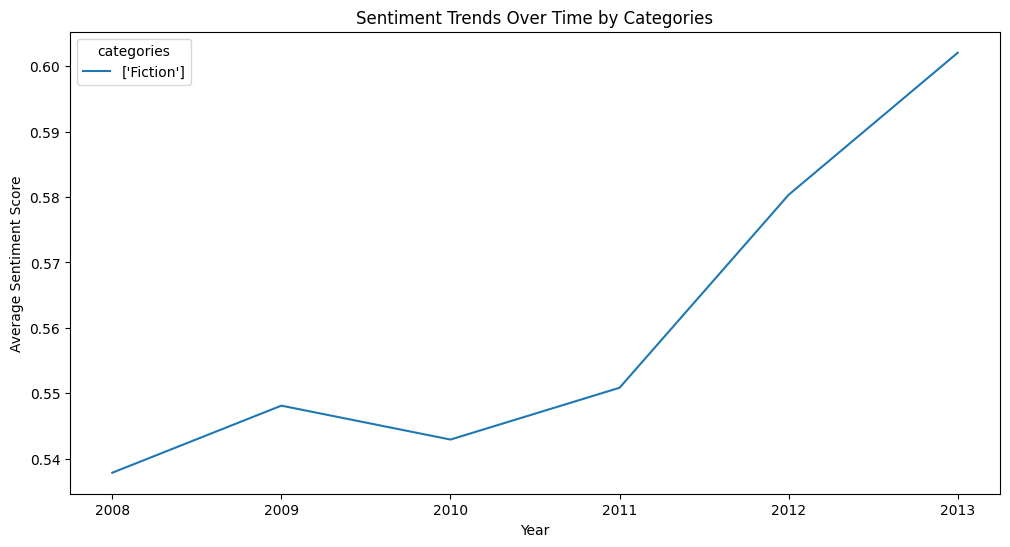

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting sentiment trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='sentiment', hue='categories')
plt.title('Sentiment Trends Over Time by Categories')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.show()


# Memory Usage Analysis

## Initial Memory Usage
The initial memory usage of the `book_reviews` DataFrame is approximately `8.15` GBs.

## After Filtering Columns
After applying the filters (date range: 2008-2013, categories: Fiction or Non-fiction), the memory usage of the `filtered_book_reviews` DataFrame is approximately `0.84` GBs.

This reduction in memory usage demonstrates the effectiveness of our data filtering strategy in managing the memory footprint of large datasets.


In [18]:
reduction_percentage = ((total_memory_usage - filtered_memory_usage) / total_memory_usage) * 100
print("Reduction in Memory Usage: {:.2f}%".format(reduction_percentage))

Reduction in Memory Usage: 89.70%


The rest can be done like the above below we shall be interested in only memory usage

## Using chunking
# Introduction to Chunk-Based Processing

When dealing with large datasets, especially those too big to fit into memory, chunk-based processing is a crucial strategy. It involves dividing the dataset into smaller, manageable chunks, processing each individually, and then combining the results. This approach is particularly effective for operations like merging two large datasets where direct processing is not feasible due to memory constraints.
We made to come since we wanted to read the dataset knowing that the memory of the system we were using wasn't enough therefore we had to use chunks if the above code has finished running if you try to read the datasets directly without chunks the data won't be loaded.

In [19]:

chunk_size = 100000  #Chunk size

# 'Title' is the common column for merging
key_column = 'Title'

# Read the second DataFrame entirely since it fits into memory
books_data = pd.read_csv("books_data.csv")

# Initialize a list to store processed chunks
processed_chunks = []

# Iterate over the first DataFrame in chunks
for chunk in pd.read_csv("Books_rating.csv", chunksize=chunk_size):
    # Merge the current chunk with the second DataFrame
    %time merged_chunk = pd.merge(chunk, books_data, on=key_column)

    # Store the processed chunk
    processed_chunks.append(merged_chunk)

# Concatenate all processed chunks into one DataFrame
final_result = pd.concat(processed_chunks)

final_result.head()

CPU times: user 111 ms, sys: 24.4 ms, total: 135 ms
Wall time: 139 ms
CPU times: user 99 ms, sys: 11.2 ms, total: 110 ms
Wall time: 113 ms
CPU times: user 115 ms, sys: 14.8 ms, total: 130 ms
Wall time: 137 ms
CPU times: user 101 ms, sys: 10.9 ms, total: 112 ms
Wall time: 118 ms
CPU times: user 101 ms, sys: 6.36 ms, total: 107 ms
Wall time: 109 ms
CPU times: user 96.7 ms, sys: 7.72 ms, total: 104 ms
Wall time: 105 ms
CPU times: user 104 ms, sys: 10.9 ms, total: 115 ms
Wall time: 120 ms
CPU times: user 98.9 ms, sys: 8.07 ms, total: 107 ms
Wall time: 107 ms
CPU times: user 99.2 ms, sys: 7.35 ms, total: 107 ms
Wall time: 107 ms
CPU times: user 98.6 ms, sys: 7.56 ms, total: 106 ms
Wall time: 106 ms
CPU times: user 101 ms, sys: 9.18 ms, total: 111 ms
Wall time: 111 ms
CPU times: user 101 ms, sys: 7.5 ms, total: 108 ms
Wall time: 109 ms
CPU times: user 99.8 ms, sys: 6.91 ms, total: 107 ms
Wall time: 107 ms
CPU times: user 98.7 ms, sys: 5.86 ms, total: 105 ms
Wall time: 105 ms
CPU times: user 

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [20]:
sampled_memory_usage = final_result.memory_usage(deep=True).sum() / (1024 ** 3)
print(f"Optimized Memory Usage with chunks :{sampled_memory_usage:0.2f} GBs")

Optimized Memory Usage with chunks :8.15 GBs


## Optimizing  data types

In [21]:
# Measurements
## Memory usage
## Computation time
## File size
# let's see the memory usage
total_memory_usage=book_reviews.memory_usage(deep=True).sum() / (1024 ** 3)
print(f"Total Memory Usage :{total_memory_usage:0.2f} GBs")

Total Memory Usage :8.13 GBs


In [22]:
book_reviews.dtypes

Id                            object
Title                         object
Price                        float64
User_id                       object
profileName                   object
review/helpfulness            object
review/score                 float64
review/time           datetime64[ns]
review/summary                object
review/text                   object
description                   object
authors                       object
image                         object
previewLink                   object
publisher                     object
publishedDate                 object
infoLink                      object
categories                    object
ratingsCount                 float64
dtype: object

In [23]:
#let do some adjustment from the datatypes above
# Optimizing object types to category
object_columns = book_reviews.select_dtypes(include=['object']).columns
for col in object_columns:
    if len(book_reviews[col].unique()) / len(book_reviews[col]) < 0.5:
        book_reviews[col] = book_reviews[col].astype('category')

# Optimizing float64 to float32
float_columns = book_reviews.select_dtypes(include=['float64']).columns
for col in float_columns:
    book_reviews[col] = book_reviews[col].astype('float32')

# Check new data types
optimized_dtypes = book_reviews.dtypes


In [24]:
optimized_dtypes

Id                          category
Title                       category
Price                        float32
User_id                     category
profileName                 category
review/helpfulness          category
review/score                 float32
review/time           datetime64[ns]
review/summary                object
review/text                   object
description                 category
authors                     category
image                       category
previewLink                 category
publisher                   category
publishedDate               category
infoLink                    category
categories                  category
ratingsCount                 float32
dtype: object

# Data Type Optimization

To optimize memory usage, we've adjusted the data types in the `book_reviews` DataFrame:

1. **Object to Category Conversion**: Columns with limited unique values, previously `object` type, have been converted to `category`. This is especially useful for columns like genres, author names, etc.

2. **Float64 to Float32 Downgrade**: Columns initially with `float64` data type have been downgraded to `float32` for reduced memory usage without significant loss of precision.

3. **Integer Type Optimization**: Where applicable, integer columns have been adjusted to use the smallest possible data type (e.g., `int8`, `int16`) based on their range of values.

After these optimizations, we believe that the DataFrame should consume significantly less memory, improving the efficiency of data processing and analysis.


Let's the memory analysis now

In [25]:
optimized_memory = book_reviews.memory_usage(deep=True).sum() / (1024 ** 3)
print(f"Optimized Memory Usage with data types :{optimized_memory:0.2f} GBs")

Optimized Memory Usage with data types :3.34 GBs


In [26]:
reduction_percentage = ((total_memory_usage - optimized_memory) / total_memory_usage) * 100
print("Reduction in Memory Usage: {:.2f}%".format(reduction_percentage))

Reduction in Memory Usage: 58.87%


In [27]:
# Outputing the csv to see the new file size
book_reviews.to_csv("optimized_combined_data.csv")

In [28]:
# Checking the size
import os
file_path = "optimized_combined_data.csv"
size_in_bytes = os.path.getsize(file_path)
size_in_gb = size_in_bytes / (1024**3)
print(f"The size of the file is {size_in_gb:.2f} GB")

The size of the file is 5.25 GB


In [29]:
### The final file size after optimizing the data types reduced by 2.86 GB

## Sampling

In [30]:
# We  shall consider 10%  of the book_review data frame
sampling_fraction = 0.1
%time sampled_book_reviews = book_reviews.sample(frac=sampling_fraction)


CPU times: user 171 ms, sys: 138 ms, total: 309 ms
Wall time: 334 ms


In [31]:
sampled_memory_usage = sampled_book_reviews.memory_usage(deep=True).sum() / (1024 ** 3)
print(f"Optimized Memory Usage with sampling :{sampled_memory_usage:0.2f} GBs")

Optimized Memory Usage with sampling :0.76 GBs


In [32]:
reduction_percentage = ((total_memory_usage - sampled_memory_usage) / total_memory_usage) * 100
print("Reduction in Memory Usage: {:.2f}%".format(reduction_percentage))

Reduction in Memory Usage: 90.65%


# Sampling Technique Analysis

## Sampling Strategy
To enhance processing efficiency and reduce computational load, a random sampling technique was employed. A fraction of `0.1` was selected, which effectively reduces the dataset to 10% of its original size.

## Memory Usage Post-Sampling
After sampling, the memory usage of the `book_reviews` DataFrame was reduced to approximately `0.76` GBs. This represents a significant decrease from the original dataset size, making it more manageable for analysis, especially in environments with limited resources.

## Implications
While sampling offers a considerable reduction in data size and memory usage, it's important to acknowledge that sampling may lead to loss of information and potential biases. Thus, the sampled dataset should be used with an understanding of these limitations, particularly in analyses where the representation of the full dataset is crucial.


## Parallelize with Dask

Dask is a library that introduces that scheduler which handles the distribution of tasks across multiple cores on the same machine and in a distributed cluster. Dask also optimizes and reuses evaluations of functions under the hood to reduce memory usage and complete tasks faster. Let us explore using Dask on the same dataset and see what reductions it yields.

In [33]:
# Loading the same Books_rating.csv and books_data.csv using Dask
dtype={'Id': 'object'}
%time df = dd.read_csv("Books_rating.csv", dtype=dtype, )
%time books_df = dd.read_csv("books_data.csv")

CPU times: user 13.1 ms, sys: 10.8 ms, total: 23.9 ms
Wall time: 28 ms
CPU times: user 5.99 ms, sys: 2.44 ms, total: 8.42 ms
Wall time: 9.16 ms


### Observation: 
We can see that the load times were faster than using Pandas, this becomes more evident on even bigger datasets

In [34]:
# Loading the first 5 observations
df.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [35]:
# Checking the initial memory management
df.info(memory_usage="deep")
books_df.info(memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Columns: 10 entries, Id to review/text
dtypes: float64(2), int64(1), string(7)
memory usage: 2.7 GB
<class 'dask.dataframe.core.DataFrame'>
Columns: 10 entries, Title to ratingsCount
dtypes: float64(1), string(9)
memory usage: 179.3 MB


### Observation
The memory usage has been reduced greatly

In [36]:
## Computation time

# Merging  both dataframes using 'Title' column
%time book_reviews = dd.merge(df, books_df, on='Title', how='inner').compute()


CPU times: user 36.5 s, sys: 10.2 s, total: 46.7 s
Wall time: 35.5 s


In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment from review text
def get_sentiment(review):
    if pd.isna(review):
        return None
    return sia.polarity_scores(review)["compound"]

# Apply sentiment analysis
%time book_reviews['sentiment'] = book_reviews['review/text'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bakunga/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


CPU times: user 43min 7s, sys: 16.2 s, total: 43min 23s
Wall time: 43min 47s


# Conclusion

The comparative analysis of different data handling strategies in the context of the "Amazon Book Reviews" dataset reveals significant differences in terms of file size, memory usage, and computation time:

-   **File Size Reduction**: 
	- **Data Type Optimization**: Led to a 58.91% reduction in file size due to more efficient data representation.
-   **Overall Memory Usage Reduction**: The most substantial memory reduction was achieved through Sampling (approximately 90.67%), followed by Data Type Optimization (approximately 58.87%). Chunk-Based Processing doesn't have exact figures as these depend on the chunks use. Dask, with its unique approach to data handling, showed efficient memory usage of 2.7 GB for "Books_rating.csv" and 179.3 MB for "books_data.csv" (64.61% compared to the initial Pandas memory usage.).
-   **Computation Time Reduction**: Dask showed the fastest initial data loading times, but for complex operations like sentiment analysis, it did not necessarily translate to the fastest overall processing times. Basic Pandas Processing, while slower for initial data loading, was more efficient for certain operations but this is only the case for smaller datasets.

These findings underscore the importance of selecting the appropriate data handling strategy based on the specific needs of the dataset and the analysis objectives. Strategies like Sampling and Data Type Optimization are highly effective for reducing memory usage, while Dask is better suited for very large datasets where its parallel processing capabilities can be fully leveraged. Combining several of these techniques can also yield better performance and reduce memory usage when handling big data.
